In [6]:
import sqlite3
import matplotlib.pylab as plt
import pandas as pd

In [7]:
def query_sqlite(sql_query, db='/home/yunyi/ethereum.db'):
    conn = sqlite3.connect(db)
    c = conn.cursor()
    c.execute(sql_query)
    res=sorted(c.fetchall())
    conn.close()
    return res

In [3]:
res_isError = query_sqlite('SELECT timeStamp, count(*) FROM transactions WHERE isError==1 GROUP BY blockNumber')
res_txns = query_sqlite('SELECT timeStamp, count(*) FROM transactions GROUP BY blockNumber')
res_creation = query_sqlite('SELECT timeStamp, count(*) \
                            FROM transactions \
                            WHERE contractAddress like "0x%" \
                            GROUP BY timeStamp')

In [8]:
def plot_timeSeries_Data(res_dic, res_dic1, title):
    df = pd.DataFrame(sorted(res_dic))
    df.columns = ['timeStamp', 'Count']
    df.timeStamp = pd.to_datetime(df.timeStamp, unit="s")
    a = df.resample('m', on='timeStamp')['Count'].sum() # Series
    u = a.index.tolist()
    v = a.tolist()
    print("total txn: ", sum(a.dropna().tolist()))
    
    df1 = pd.DataFrame(sorted(res_dic1))
    df1.columns = ['timeStamp', 'Count']
    df1.timeStamp = pd.to_datetime(df1.timeStamp, unit="s")
    a1 = df1.resample('m', on='timeStamp')['Count'].sum() # Series
    u1 = a1.index.tolist()
    v1 = a1.tolist()
    print("txn w/ error: ", sum(a1.dropna().tolist()))

    # plot
    plt.figure(figsize=(10, 6))
    plt.plot(u[:-1], v[:-1], "go-", label='total txn')
    plt.plot(u1[:-1], v1[:-1], "ro-", label='txn w/ error')
    plt.title(title)
    
    # beautify the x-labels
    plt.gcf().autofmt_xdate()
    plt.ylabel('Monthly Count')
    
    # add vertical line for hard fork
    hard_forks = [1441661589, 1457981393, 1469020840, 1476796771, 1479831344, 1508131331]
    fork_names = ['Frontier Thawing (Planned)', 'Homestead (Planned)', 'Dao Fork', 'EIP-150 Hard Fork', 'Spurious Dragon', 'Byzantium (Planned)']
    line_format = ['g', 'c', 'k', 'y', 'w', 'm']
    i = 0
    for z in hard_forks:
        xc = pd.to_datetime(z, unit="s")
        plt.axvline(x=xc, linestyle='--', color=line_format[i], label=fork_names[i])
        i += 1

    plt.legend(loc="upper left", bbox_to_anchor=[0, 1],
       ncol=1, shadow=False, title="Legend", fancybox=True)

    plt.show()

total txn:  36203106.0
txn w/ error:  1750740.0


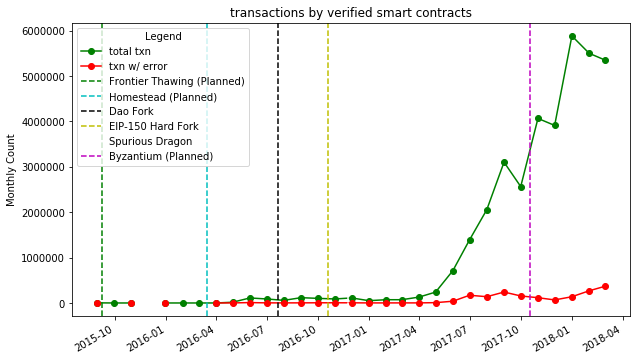

In [9]:
plot_timeSeries_Data(res_txns, res_isError, title='transactions by \
verified smart contracts')

In [14]:
def plot_single_data(res_dict, title):
    df = pd.DataFrame(sorted(res_dict))
    df.columns = ['timeStamp', 'Count']
    df.timeStamp = pd.to_datetime(df.timeStamp, unit="s")
    a = df.resample('m', on='timeStamp')['Count'].sum() # Series
    u = a.index.tolist()
    v = a.tolist()
    
    plt.figure(figsize=(8,5))
    print(sum(a.dropna().tolist()))
    
    plt.plot(u[:-1], v[:-1], "o-")
    plt.ylabel('Monthly Count')
    plt.title(title)
    plt.gcf().autofmt_xdate()
    plt.show()

14637.0


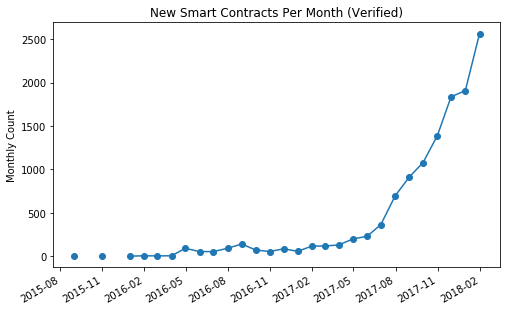

In [15]:
plot_single_data(res_creation, "New Smart Contracts Per Month (Verified)")